In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [ ]:
from preprocess import Preprocess
from training import Training

p = Preprocess()
p.main_run()

# we tried the training process on 4 Tesla V100 cards.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2,3' 

t = Training()
t.train()
t.testing()

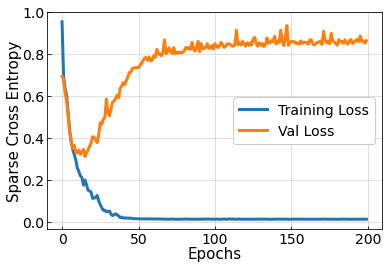

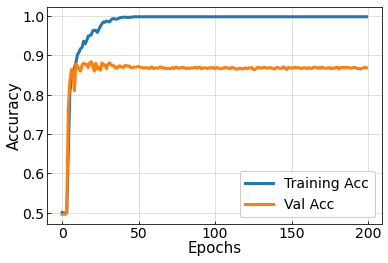

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

with open('log/train/replica_on_226/train_last_aux.pkl','rb') as f:
    sd = pickle.load(f)
his = sd['history']
    
fig, ax = plt.subplots()
loss_train = his['loss']
loss_val = his['val_loss']
n = range(len(loss_train))
plt.plot(n, loss_train, label='Training Loss',linewidth=3)
plt.plot(n, loss_val, label='Val Loss', linewidth=3)
plt.xlabel('Epochs', size=15,labelpad=0)
plt.ylabel('Sparse Cross Entropy', size=15, labelpad=0)
plt.tick_params(labelsize=14,direction='in',pad=2.5)
ax.legend(fontsize=14, framealpha=1)
plt.grid(alpha=0.5)

fig, ax = plt.subplots()
acc_train = his['acc']
acc_val = his['val_acc']
plt.plot(n, acc_train, label='Training Acc',linewidth=3)
plt.plot(n, acc_val, label='Val Acc', linewidth=3)
plt.xlabel('Epochs', size=15,labelpad=0)
plt.ylabel('Accuracy', size=15, labelpad=0)
plt.tick_params(labelsize=14,direction='in',pad=2.5)
ax.legend(fontsize=14, framealpha=1)
plt.grid(alpha=0.5)

In [35]:
import numpy as np
logits = np.load('log/props.npy')
y_truth = np.load('log/y_truth.npy').astype(int)
y_pred = (logits>=0.5).astype(int)

In [40]:
for i in range(len(y_pred)//20-1):
    print(f'y_pred:  {y_pred[20*i:(20*i+20)]}')
    print(f'y_truth: {y_truth[20*i:(20*i+20)]}')
    print('\n')

y_pred:  [0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
y_truth: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


y_pred:  [0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1]
y_truth: [0 1